<a href="https://colab.research.google.com/github/ClemenceBatardiereW/mamiavan/blob/main/Cl%C3%A9mence_30_Ex2_Retention_matrix_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 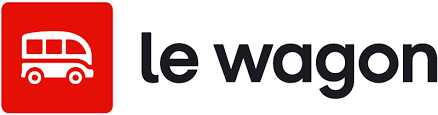

# Greenweez retention matrix

We will study covid's impact on Greenweez business with a focus on users'retention.

Covid lockdowns in France:
- from March 17 to May 11, 2020, i.e. 1 month and 25 days;
- from October 30 to December 15, 2020, i.e. 1 month and 15 days;
- from April 3 to May 3, 2021, i.e. 28 days.

## Turnover analysis

a) Load Greenweez orders by executing the following cell. It takes two minutes of execution.

In [ ]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

# Query Bigquery
query = "SELECT * FROM `data-analytics-bootcamp-363212.course30.gwz_orders` ORDER BY date_date"

df_orders = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")

b) Convert column `date_date` to datetime.

c) Set column `date_date` as index

d) Calculate total turnover per year using `.resample()` method and store result in a `df_y_turnover` variable.

date_date
2019-12-31    20990674.51
2020-12-31    30413594.84
2021-12-31    25917818.28
Freq: A-DEC, Name: total_turnover, dtype: float64

e) Calculate purcentage change 2020 and 2021 vs 2019.
What was covid impact on turnover ?

f) We will have a closer look if turnover increase comes from additional users or a bigger average order.

Using `resample()` function, create a new variable `df_m_turnover` which is total turnover per month.

g) Plot the result using Plotly express. 
Can you identify a pick in this chart ? Which month is it ?

h) Plot a similar chart but showing the average turnover instead. What do you see ?

i) Let consider that a customer is new when the first order is done.
What does this code do ?


In [ ]:
df_first_orders = df_orders.reset_index().groupby("customers_id", as_index=False).first()
df_first_orders

j) From `df_first_orders` and in a new variable `df_new_customers`, compute the number of new users per month.

Hint: `resample()` function has a "on" parameter...

k) Plot it in a graph with Plotly express. Which months have the most new customers ? Why do we have so many new users before Jul 2019 ? Is it correct ?

l) What can you conclude ?

## Matrix retention

We will now study how long customers stay to have a better understanding of the previous analysis. We will do a cohort analysis.

a) We won't do resampling methods anymore. Use `.reset_index()` method on `df_orders` to bring back `date_date` as column and not an index anymore.

b) In `df_first_orders` variables, rename column `date_date` by `member_at`.
Use `.rename(columns={"old_name":"new_name"})` method.

c) Add column `member_at` to `df_orders` variable.
For that, we will merge `df_orders` and `df_first_orders` together. Keep only `customers_id` and `member_at` when performing the merge to avoid columns dupicates.

We will store the result in a `df_cohort` variable.

d) We will create cohorts based on `member_at` month. Execute cell below to do so. 

Note that because `member_at` is of type datetime, we can cast it to specific format like datetime64[M].

What does it do exactly ?

In [ ]:
df_cohort["cohort"] = df_cohort["member_at"].astype('datetime64[M]')
df_cohort[["member_at", "cohort"]]

e) In a new variable `df_cohort_size` calculate numer of unique users per `cohort`. You can use `.nunique()` function to do it.

f) For this study, we will not take orders made on december 2021 because we do not have them all and will take only orders made by customers having a member_at after 2019.

Filter `df_cohort` on `date_date` < "2021-12-01" and `member_at` > "2019-12-31". 

Filter `df_cohort_size` on "2020-01-01":"2021-11-01"

g) We will consider a customer being active when he makes an order. We won't consider the first order as being active because it's more like a subscription.

Filter `df_cohort` on `date_date` > `member_at` to do so.

h) Look at the cell below and comment what it does.
Execute the cell to create `nb_months` column.

In [ ]:
import numpy as np

df_cohort["nb_months"] = (df_cohort["date_date"] - df_cohort["member_at"]) / np.timedelta64(1,'M')
df_cohort["nb_months"] = df_cohort["nb_months"].astype(int) + 1

i) To be able to create a rentention matrix, we will have to count the number of unique `customer_ids` by `cohort` and `nb_months`. Do it and store the result in a variable `df_retention`.

Don't forget to use as_index=False in groupby() function as we don't want put `cohort` and `nb_months` as indexes.

j) From `df_retention` create a pivot table with `cohort` as index and `nb_months` as columns.

Complete the code below to do it.

This result is what we call a retention matrix:
- A row gives the percentage of users of the cohort still active over the months
- A column gives the evolution of the percentage of users still active at the end of this period over the cohorts.

In [ ]:
# to be completed
retention = 

# delete one column index level
retention.columns = retention.columns.droplevel()
retention

k) Results are difficult to read when it's not represented as purcentage of active users.

We need to divide those values by `df_cohort_size` we calculated before. 
Because we are not divided by a simple value but by a pandas.Series indexed by a date, you will need to use `.div()` function.

**Hint: be careful to choose the good axis parameter**

l) As always, visualisation skills are fundamental if we want to analyse those data.

Execute the cell below that uses Plotly Express and the method `imshow()`.

In [ ]:
import plotly.express as px

fig = px.imshow(retention, text_auto=".0%") 
fig.show()

m) What conclusions can you make?